In [ ]:
# 1-2 서포트 벡터 머신(SVM)를 이용한 분류
# 라이브러리 호출
from sklearn import svm
from sklearn import metrics
from sklearn import datasets
from sklearn import model_selection
import tensorflow as tf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'    # 0-모든 로그, 1-info 필터링, 2-warning 필터링, 3-error 필터링

# iris 데이터 로드
iris = datasets.load_iris()
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    iris.data, iris.target, test_size=0.6, random_state=42)

# 사이킷런 사용하여 SVM 모델 생성 및 훈련 진행
svm = svm.SVC(kernel='linear', C=1.0, gamma=0.5)
svm.fit(X_train, y_train)

In [ ]:
# 예측 평가
predictions = svm.predict(X_test)       # 반환값은 X_test에 대한 학습 결과
# 정확도 - 예측 결과와 실제 결과를 비교
score = metrics.accuracy_score(y_test, predictions)
print('정확도 : {0:f}'.format(score))

In [ ]:
# 1-3 결정 트리
import pandas as pd
df = pd.read_csv('./data/titanic/train.csv', index_col='PassengerId')       # PassengerId를 열 인덱스로 사용
print(df.head())

In [13]:
# 특정 컬럼 값을 구분
df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]
# 성별을 문자열 아닌 정수로 표현
df['Sex'] = df['Sex'].map({'male': 0, 'female':1})
# 결측치 제거
df = df.dropna()

In [14]:
# 훈련데이터 처리 - 훈련값, 정답(lables)
X = df.drop('Survived', axis=1)
y = df['Survived']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# 의사결정 트리 모델
from sklearn import tree
model = tree.DecisionTreeClassifier()

model.fit(X_train, y_train)

In [ ]:
y_predict = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

In [ ]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted Not Survial', 'Predicted Survival'],
    index=['True Not Survival', 'True Survival']
)

In [2]:
# 1-4 로지스틱 회귀
# 라이브러리 호출 및 데이터 준비
%matplotlib inline
from sklearn.datasets import load_digits
digits = load_digits()

print("Image Data Shape", digits.data.shape)
print("Label data SHape", digits.target.shape)

Image Data Shape (1797, 64)
Label data SHape (1797,)


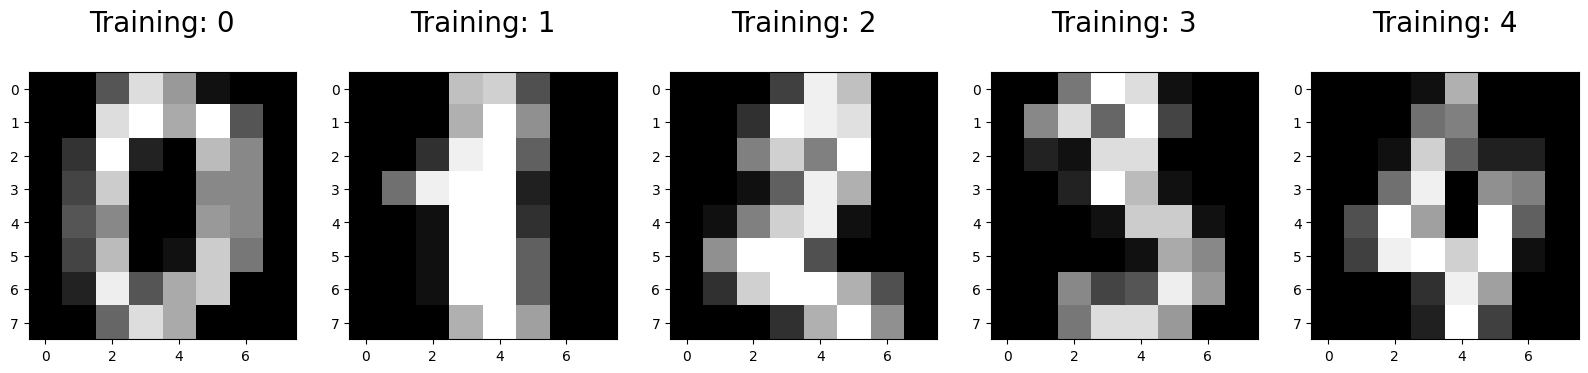

In [3]:
# digits 데이터셋의 시각화
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize=20)

In [2]:
# 훈련 데이터 및 Label 생성
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    digits.data,
    digits.target,
    test_size=0.25,
    random_state=0
)

from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

NameError: name 'digits' is not defined

In [1]:
# 일부 데이터 사용하여 모델 예측
logisticRegr.predict(X_test[0].reshape(1, -1))  # 한 개 이미지
logisticRegr.predict(X_test[0:10])                      # 10개 이미지

NameError: name 'logisticRegr' is not defined

In [ ]:
# 전체 모델 예측
predictions = logisticRegr.predict(X_test)
score = logisticRegr.score(X_test, y_test)
print(score)

In [ ]:
# 혼동 행렬 시각화
import numpy as np
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');         # y축
plt.xlabel('Predicted label');   # x축
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size=15);   
plt.show()

In [81]:
# 1-5 선형 회귀
# 데이터 처리를 위한 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 머신 러닝을 위한 라이브러리
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [84]:
# 데이터 로드
datasets = pd.read_csv('./data/weather.csv')
datasets.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,11/1/2007,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,11/2/2007,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes


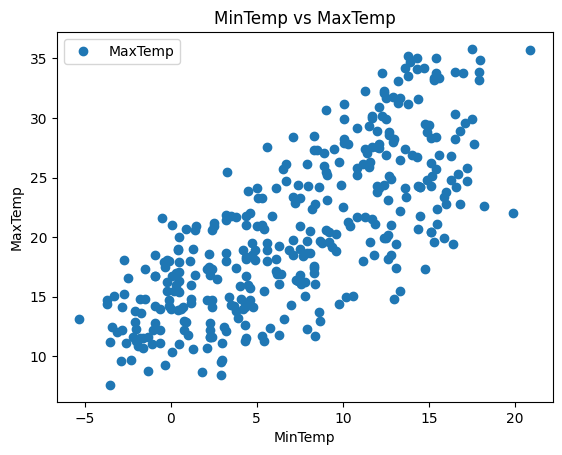

In [88]:
# 그래프를 이용한 최대/최소 온도 비교
datasets.plot(x='MinTemp', y='MaxTemp', style='o')
plt.title('MinTemp vs MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

In [90]:
# 데이터를 독립 변수와 종속 변수로 분리하고 선형 회귀 모델 생성
X = datasets['MinTemp'].values.reshape(-1,1)
y = datasets['MaxTemp'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [92]:
# 회귀 모델에 대한 예측
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicetd': y_pred.flatten()})
df

,Actual,Predicetd
0,15.1,11.443842
1,11.1,12.045760
2,21.7,23.998120
3,14.7,16.345170
4,14.1,14.883370
...,...,...
69,19.4,25.545908
70,11.8,19.698710
71,22.0,18.236910
72,14.3,17.291040


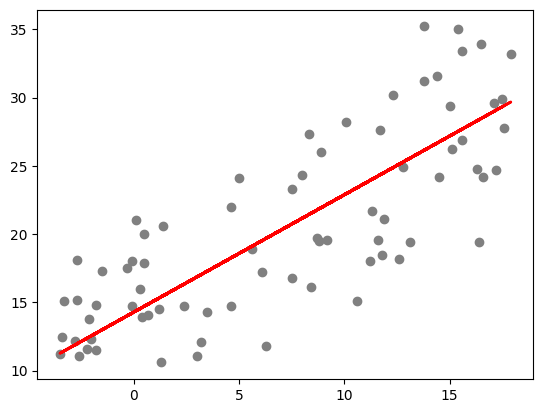

In [94]:
# 테스트 데이터셋을 사용한 회귀선 표현
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [96]:
# 평가(평균 제곱오차와 루트 평균 제곱을 사용한 모델 평가)
print('평균 제곱법 : ', metrics.mean_squared_error(y_test, y_pred))
print('루트 평균 제곱법 : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

평균 제곱법 :  17.772808491817898
루트 평균 제곱법 :  4.215780887548344
